# Resnet50 Model

### <u>Action Classes - 5</u>

In [1]:
from keras import models
from keras.layers import Dense,Flatten
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

from keras.applications import resnet

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2022-08-31 15:41:54.173019: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 15:41:54.444100: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 15:41:54.444365: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


<img src="https://upload.wikimedia.org/wikipedia/commons/9/98/ResNet50.png" />

## Dataset

In [3]:
from keras.preprocessing.image import ImageDataGenerator

dataset_path = "./frames/"
# will contain the categories in respective folders

# Data generators
# train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_datagen = ImageDataGenerator(dtype = 'float32', preprocessing_function=tf.keras.applications.resnet.preprocess_input, validation_split=0.2)

In [4]:
image_size = (224,224)
batch_size = 10

train_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "training"
)

validation_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "validation"
)

test_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "validation"
)

Found 1546 images belonging to 5 classes.
Found 384 images belonging to 5 classes.
Found 384 images belonging to 5 classes.


In [5]:
train_batches.class_indices

{'ApplyLipstick': 0,
 'Biking': 1,
 'Kayaking': 2,
 'ShavingBeard': 3,
 'TennisSwing': 4}

In [6]:
from matplotlib import pyplot as plt

def plot_images(images_arr):
    fig, axes = plt.subplots(1,10)
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

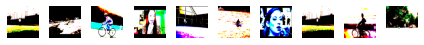

[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [7]:
imgs, labels = train_batches[0]
plot_images(imgs)
print(labels[:10])

In [8]:
resnet50modeltop = resnet.ResNet50(include_top=True,
                   input_shape=(224,224,3),
                   pooling='avg',
                   weights='imagenet')

for (i,layer) in enumerate(resnet50modeltop.layers):
    print((i, layer.name, layer.output_shape))

2022-08-31 15:41:55.632655: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-31 15:41:55.633243: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 15:41:55.633504: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 15:41:55.633622: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

(0, 'input_1', [(None, 224, 224, 3)])
(1, 'conv1_pad', (None, 230, 230, 3))
(2, 'conv1_conv', (None, 112, 112, 64))
(3, 'conv1_bn', (None, 112, 112, 64))
(4, 'conv1_relu', (None, 112, 112, 64))
(5, 'pool1_pad', (None, 114, 114, 64))
(6, 'pool1_pool', (None, 56, 56, 64))
(7, 'conv2_block1_1_conv', (None, 56, 56, 64))
(8, 'conv2_block1_1_bn', (None, 56, 56, 64))
(9, 'conv2_block1_1_relu', (None, 56, 56, 64))
(10, 'conv2_block1_2_conv', (None, 56, 56, 64))
(11, 'conv2_block1_2_bn', (None, 56, 56, 64))
(12, 'conv2_block1_2_relu', (None, 56, 56, 64))
(13, 'conv2_block1_0_conv', (None, 56, 56, 256))
(14, 'conv2_block1_3_conv', (None, 56, 56, 256))
(15, 'conv2_block1_0_bn', (None, 56, 56, 256))
(16, 'conv2_block1_3_bn', (None, 56, 56, 256))
(17, 'conv2_block1_add', (None, 56, 56, 256))
(18, 'conv2_block1_out', (None, 56, 56, 256))
(19, 'conv2_block2_1_conv', (None, 56, 56, 64))
(20, 'conv2_block2_1_bn', (None, 56, 56, 64))
(21, 'conv2_block2_1_relu', (None, 56, 56, 64))
(22, 'conv2_block2_2_c

In [9]:
resnet50model = resnet.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=5,
                   weights='imagenet')

    
for (i,layer) in enumerate(resnet50model.layers):
    layer.trainable = False
    print((i, layer.name, layer.output_shape, layer.trainable))

(0, 'input_2', [(None, 224, 224, 3)], False)
(1, 'conv1_pad', (None, 230, 230, 3), False)
(2, 'conv1_conv', (None, 112, 112, 64), False)
(3, 'conv1_bn', (None, 112, 112, 64), False)
(4, 'conv1_relu', (None, 112, 112, 64), False)
(5, 'pool1_pad', (None, 114, 114, 64), False)
(6, 'pool1_pool', (None, 56, 56, 64), False)
(7, 'conv2_block1_1_conv', (None, 56, 56, 64), False)
(8, 'conv2_block1_1_bn', (None, 56, 56, 64), False)
(9, 'conv2_block1_1_relu', (None, 56, 56, 64), False)
(10, 'conv2_block1_2_conv', (None, 56, 56, 64), False)
(11, 'conv2_block1_2_bn', (None, 56, 56, 64), False)
(12, 'conv2_block1_2_relu', (None, 56, 56, 64), False)
(13, 'conv2_block1_0_conv', (None, 56, 56, 256), False)
(14, 'conv2_block1_3_conv', (None, 56, 56, 256), False)
(15, 'conv2_block1_0_bn', (None, 56, 56, 256), False)
(16, 'conv2_block1_3_bn', (None, 56, 56, 256), False)
(17, 'conv2_block1_add', (None, 56, 56, 256), False)
(18, 'conv2_block1_out', (None, 56, 56, 256), False)
(19, 'conv2_block2_1_conv', (No

In [10]:
model = models.Sequential()

flatten = Flatten()  # adding Flatten Layer
dense_layer_1 = Dense(32, activation='relu')  # Adding a Dense layer
prediction_layer = Dense(5, activation='softmax')

model.add(resnet50model)
model.add(flatten)
model.add(dense_layer_1)
model.add(prediction_layer)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 23,653,445
Trainable params: 65,733
Non-trainable params: 23,587,712
_________________________________________________________________


In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [12]:
model.save("./models/action-class-05-resnet50.h5")

In [13]:
fit = model.fit(train_batches, epochs=20, validation_data=validation_batches)

Epoch 1/20


2022-08-31 15:42:05.948817: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-08-31 15:42:07.363973: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


155/155 [==============================] - 27s 135ms/step - loss: 0.1883 - accuracy: 0.9353 - val_loss: 0.1557 - val_accuracy: 0.9453
Epoch 2/20
155/155 [==============================] - 17s 110ms/step - loss: 0.0203 - accuracy: 0.9922 - val_loss: 0.2624 - val_accuracy: 0.9010
Epoch 3/20
155/155 [==============================] - 17s 110ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.1484 - val_accuracy: 0.9557
Epoch 4/20
155/155 [==============================] - 17s 110ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1395 - val_accuracy: 0.9557
Epoch 5/20
155/155 [==============================] - 17s 110ms/step - loss: 8.2948e-04 - accuracy: 1.0000 - val_loss: 0.1322 - val_accuracy: 0.9609
Epoch 6/20
155/155 [==============================] - 18s 113ms/step - loss: 6.1966e-04 - accuracy: 1.0000 - val_loss: 0.1309 - val_accuracy: 0.9635
Epoch 7/20
155/155 [==============================] - 18s 116ms/step - loss: 4.9098e-04 - accuracy: 1.0000 - val_loss: 0.1357 - val_a

In [14]:
model.save("./models/action-class-05-trained-resnet50.h5")

## Evaluate and Predict

In [15]:
model = models.load_model("./models/action-class-05-trained-resnet50.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 23,653,445
Trainable params: 65,733
Non-trainable params: 23,587,712
_________________________________________________________________


In [16]:
model.evaluate(test_batches)

39/39 [==============================] - 6s 121ms/step - loss: 0.1650 - accuracy: 0.9479


[0.16502393782138824, 0.9479166865348816]

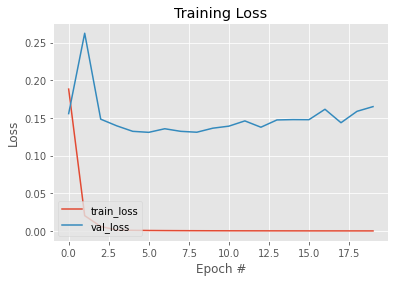

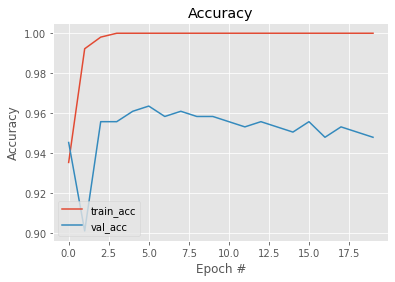

In [17]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, 20), fit.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), fit.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()

plt.plot(np.arange(0, 20), fit.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), fit.history["val_accuracy"], label="val_acc")
plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()

In [18]:
print("Avg Val Acc: " + str(sum(fit.history["val_accuracy"])/20*100))
print("Avg Val Loss: " + str(sum(fit.history["val_loss"])/20*100))

Avg Val Acc: 95.20833373069763
Avg Val Loss: 14.995239526033401
